<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/MobileNet_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 2s 0us/step


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls ./gdrive/My\ Drive/

'Colab Notebooks'
'CV mine1-converted.pdf'
'Drift Dept selection DRT820.gsheet'
'GA4GH Projects for GSoC 2020.gdoc'
'Google Drive.lnk'
'GSoc JSON-schema-store proposal.gdoc'
'https:  www.onlinesbi.com sbicollect paymenthistory paymenthistoryredirecturl.htm.pdf'
'letter to SDO .gdoc'
 NIT_JSR
'Notice for fee remission under MEBC, OEBC scheme...pdf'
'Ojass-19 Enquiry form.gform'
"Ojass'19 Survey Form.gform"
'Ojass'\''19 Survey Form (Responses).gsheet'
 Ojass.gform
 plane.jpg
 safari.jpg
'Sponsors list 2k19.xls'
 street.jpg
 track0.jpg
 track1.jpg
 track2.jpg
 track3.jpg
 track4.jpg
 track5.jpg
'Untitled document.gdoc'
'Untitled form.gform'
'Untitled spreadsheet.gsheet'
 VID20190413084036.mp4
 VID_20190413_084342.mp4


In [0]:
def prepare_image(file):
  img_path = 'gdrive/My Drive/'
  img = image.load_img(img_path + file, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array,axis=0)
  return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

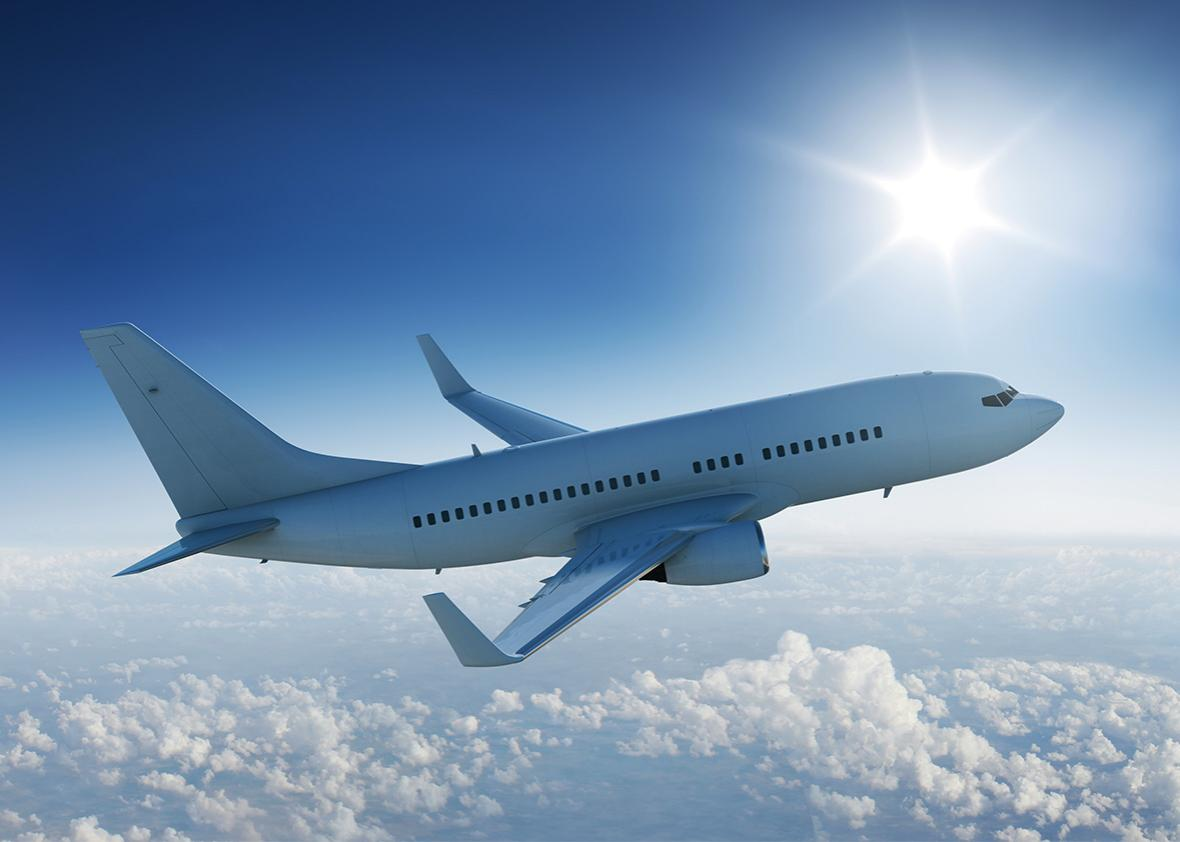

In [0]:
from IPython.display import Image
Image(filename='gdrive/My Drive/plane.jpg',width=300,height=200)

In [0]:
preprocessed_image = prepare_image('plane.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04592741', 'wing', 0.7954055),
  ('n02690373', 'airliner', 0.19237767),
  ('n03773504', 'missile', 0.0050485185),
  ('n04008634', 'projectile', 0.0037803291),
  ('n04552348', 'warplane', 0.0012674973)]]